<a href="https://colab.research.google.com/github/betheman/Deep-Learning/blob/master/MNIST_Digit_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import seaborn as sns


In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

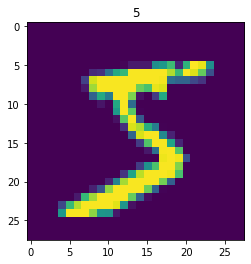

In [24]:
plt.title(y_train[0])
plt.imshow(X_train[0])

In [0]:
X_train=X_train.reshape(len(X_train),28*28)
X_test=X_test.reshape(len(X_test),28*28)

In [0]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
oneHot=OneHotEncoder(sparse=False).fit(y_train)

In [0]:
y_train=oneHot.transform(y_train)

In [0]:
oneHot=OneHotEncoder(sparse=False).fit(y_test)

In [0]:
y_test=oneHot.transform(y_test)

In [0]:
learning_rate=.01
epochs=500
batch_size=int(len(X_train)*.40)

In [0]:
W=tf.Variable(tf.random_normal(shape=[28*28,10]),dtype=tf.float32)
b=tf.Variable(tf.random_normal(shape=[1,10]),dtype=tf.float32)

In [0]:
data=tf.placeholder(shape=[None,28*28],dtype=tf.float32)
labels=tf.placeholder(shape=[None,10],dtype=tf.float32)

In [0]:
matrix_mul=tf.matmul(data,W)+b

In [0]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=matrix_mul,labels=labels))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

In [0]:
goal=optimizer.minimize(loss=loss)

In [0]:
prediction = tf.nn.softmax(matrix_mul)
# Bool into float32 type
correct = tf.cast(tf.equal(tf.arg_max(prediction,1), tf.arg_max(labels,1)), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

In [0]:
loss_trace = []
train_acc = []
test_acc = []

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [42]:
for epoch in range(epochs):
    sess.run(goal, feed_dict={data: X_train, labels: y_train})
    temp_loss = sess.run(loss, feed_dict={data: X_train, labels: y_train})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, labels: y_train})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, labels: y_test})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 25 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))


epoch:   25 loss: 291.988159 train_acc: 0.770433 test_acc: 0.779200
epoch:   50 loss: 204.199799 train_acc: 0.815317 test_acc: 0.821500
epoch:   75 loss: 200.732407 train_acc: 0.818133 test_acc: 0.819400
epoch:  100 loss: 156.691818 train_acc: 0.841650 test_acc: 0.844900
epoch:  125 loss: 149.254898 train_acc: 0.849083 test_acc: 0.848200
epoch:  150 loss: 149.028183 train_acc: 0.840167 test_acc: 0.842500
epoch:  175 loss: 123.374016 train_acc: 0.864133 test_acc: 0.862400
epoch:  200 loss: 159.887070 train_acc: 0.833350 test_acc: 0.834000
epoch:  225 loss: 108.873817 train_acc: 0.875383 test_acc: 0.874300
epoch:  250 loss: 155.326660 train_acc: 0.827833 test_acc: 0.829200
epoch:  275 loss: 100.958359 train_acc: 0.878600 test_acc: 0.876400
epoch:  300 loss: 122.628288 train_acc: 0.860650 test_acc: 0.858000
epoch:  325 loss: 100.188103 train_acc: 0.876817 test_acc: 0.875600
epoch:  350 loss: 92.652451 train_acc: 0.886600 test_acc: 0.883500
epoch:  375 loss: 211.406754 train_acc: 0.788967 

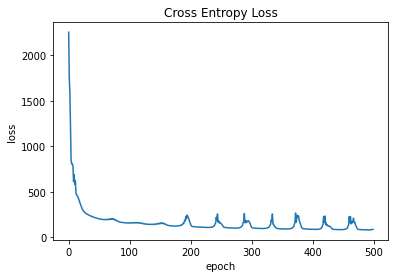

In [43]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

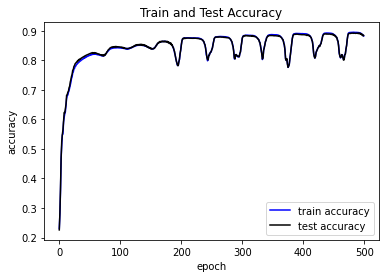

In [44]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
mod = tf.matmul(data, W) + b
x=sess.run(mod,feed_dict={data:X_test})
predic=tf.nn.softmax(x)

In [0]:
predictions=sess.run(tf.arg_max(predic,1))

In [0]:
y_true=sess.run(tf.arg_max(y_test,1))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
confusion_matrix(y_true,predictions)

array([[ 928,    0,    4,    1,    0,   13,   15,    2,   15,    2],
       [   0, 1062,    5,    2,    1,    3,    6,    2,   53,    1],
       [   7,    7,  874,   34,    7,    3,   10,   11,   70,    9],
       [   4,    0,   22,  887,    2,   24,    2,   12,   50,    7],
       [   1,    2,    5,    2,  885,    2,   15,    8,   26,   36],
       [  17,    3,    6,   45,   10,  653,   21,    7,  123,    7],
       [  18,    3,    8,    2,   19,   11,  882,    1,   14,    0],
       [   1,    3,   17,   12,    6,    0,    1,  936,   14,   38],
       [   5,    4,    4,   18,   14,   13,    9,   13,  893,    1],
       [   7,    4,    2,   13,   55,    3,    1,   39,   45,  840]])

In [50]:
print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.98      0.94      0.96      1135
           2       0.92      0.85      0.88      1032
           3       0.87      0.88      0.88      1010
           4       0.89      0.90      0.89       982
           5       0.90      0.73      0.81       892
           6       0.92      0.92      0.92       958
           7       0.91      0.91      0.91      1028
           8       0.69      0.92      0.78       974
           9       0.89      0.83      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.89     10000

